<a href="https://colab.research.google.com/github/Arjun650/MachineLearning/blob/main/Lab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as la

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import statistics

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

df = pd.read_excel('labSession.xlsx')
df = df.dropna(axis = 1)
df


,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs)
0,C_1,20,6,2,386
1,C_2,16,3,6,289
2,C_3,27,6,2,393
3,C_4,19,1,2,110
4,C_5,24,4,2,280
5,C_6,22,1,5,167
6,C_7,15,4,2,271
7,C_8,18,4,2,274
8,C_9,21,1,4,148
9,C_10,16,2,4,198


In [4]:
A = df.iloc[:, 1:-1].values
B =df.iloc[:, -1].values

A = np.array(A)
B = np.array(B)

print("Matrix A :")
print(A)
print("Matrix B :")
print(B)

# number of vectors
noOfVector = A.shape[0]
print('Number of vector is : ', noOfVector)


# Dimensionality
DimensionalityOfA = A.shape[1]
DimensionalityOfB = A.shape[1]
print("Dimensionality of A is" , DimensionalityOfA)
print("Dimensionality of B is" , DimensionalityOfB)



Matrix A :
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
Matrix B :
[386 289 393 110 280 167 271 274 148 198]
Number of vector is :  10
Dimensionality of A is 3
Dimensionality of B is 3


In [5]:
rank = np.linalg.matrix_rank(A)
print("Rank of matrix A is", rank)

Rank of matrix A is 3


In [6]:
# Using Pseudo-Inverse find the cost of each product available for sale.
# (Suggestion: If you use Python, you can use numpy.linalg.pinv() function to get a
# pseudo-inverse.)

pseudoInverse = np.linalg.pinv(A)
priceEachProduct = pseudoInverse.dot(B)
priceEachProduct = np.array(priceEachProduct)
print(priceEachProduct)

[ 1. 55. 18.]


In [7]:
# . Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products
# available with the vendor.

X = np.dot(pseudoInverse, B)
print(X)

[ 1. 55. 18.]


In [8]:
# Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others
# as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on
# purchase behavior.

df['Category'] = df['Payment (Rs)'] > 200
df['Category'] = df['Category'].replace({True:'Rich', False:'Poor'})

print(df)


  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs) Category
0      C_1           20             6                 2           386     Rich
1      C_2           16             3                 6           289     Rich
2      C_3           27             6                 2           393     Rich
3      C_4           19             1                 2           110     Poor
4      C_5           24             4                 2           280     Rich
5      C_6           22             1                 5           167     Poor
6      C_7           15             4                 2           271     Rich
7      C_8           18             4                 2           274     Rich
8      C_9           21             1                 4           148     Poor
9     C_10           16             2                 4           198     Poor


IRCTC Stock Price

In [9]:
# Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file. Do the
# following after loading the data to your programming platform.

irctc_df = pd.read_excel('labSession.xlsx', sheet_name = 'IRCTC Stock Price')
irctc_df = irctc_df.dropna(axis=1)
print(irctc_df)

             Date Month  Day    Price     Open     High      Low   Volume  \
0    Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1    Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2    Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3    Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4    Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   
..            ...   ...  ...      ...      ...      ...      ...      ...   
244  Jul 07, 2020   Jul  Tue  1397.40  1410.00  1411.00  1390.05  480.21K   
245  Jul 06, 2020   Jul  Mon  1400.75  1405.50  1415.50  1394.00  614.93K   
246  Jul 03, 2020   Jul  Fri  1405.10  1415.00  1425.00  1398.00  599.49K   
247  Jul 02, 2020   Jul  Thu  1412.35  1440.00  1467.80  1395.30    2.16M   
248  Jul 01, 2020   Jul  Wed  1363.05  1363.65  1377.00  1356.00  383.00K   

       Chg%  
0    0.0020  
1    0.0043  
2   -0.0020  
3   -0.0026  
4   -

In [10]:
price_data = irctc_df['Price'].tolist()
print(price_data)

priceMean = statistics.mean(price_data)
priceVariance = statistics.variance(price_data)

print("Mean : " ,priceMean)
print("Variance : " ,priceVariance)

[2081.85, 2077.75, 2068.85, 2072.95, 2078.25, 2083.0, 2076.85, 2011.7, 2050.4, 2089.95, 2097.95, 2064.4, 2093.75, 2106.35, 2071.2, 2144.85, 2094.8, 1921.7, 1921.8, 1917.95, 1894.6, 1903.2, 1896.25, 1928.35, 1894.05, 1907.95, 1884.5, 1862.0, 1855.65, 1858.1, 1835.05, 1762.1, 1747.65, 1746.6, 1792.3, 1748.65, 1693.4, 1725.2, 1723.65, 1770.2, 1765.55, 1791.4, 1792.55, 1795.85, 1793.2, 1730.85, 1712.0, 1673.05, 1640.05, 1612.7, 1627.45, 1608.1, 1611.65, 1582.0, 1730.9, 1726.4, 1709.0, 1688.55, 1702.65, 1751.75, 1757.0, 1755.25, 1747.4, 1721.85, 1760.55, 1842.15, 1838.05, 1855.45, 1766.65, 1824.0, 1904.05, 1947.05, 1987.35, 2018.5, 2026.7, 2015.45, 1940.85, 1961.1, 1886.1, 1897.65, 1938.45, 1759.65, 1726.95, 1675.45, 1632.9, 1615.85, 1675.4, 1701.2, 1698.65, 1674.15, 1713.1, 1731.9, 1619.0, 1618.4, 1641.75, 1618.7, 1555.0, 1518.9, 1469.35, 1470.5, 1459.9, 1456.1, 1457.05, 1438.25, 1426.25, 1432.45, 1454.5, 1452.7, 1443.5, 1423.35, 1441.2, 1463.1, 1461.15, 1480.45, 1460.7, 1471.5, 1489.45, 1

In [11]:
wednesday_data = irctc_df[irctc_df['Day'] == 'Wed']['Price']
wednesday_data = wednesday_data.tolist()

wedMean = statistics.mean(wednesday_data)

print("Mean of Wednesday Price: ", wedMean)

Mean of Wednesday Price:  1550.706


In [12]:
# Select the price data for the month of Apr and calculate the sample mean. Compare the
# mean with the population mean and note your observations.

AprData = irctc_df[irctc_df['Month'] == 'Apr']['Price'].tolist()
print(AprData)

AprMean = statistics.mean(AprData)

print('The mean of April month is ', AprMean)

[1791.4, 1792.55, 1795.85, 1793.2, 1730.85, 1712.0, 1673.05, 1640.05, 1612.7, 1627.45, 1608.1, 1611.65, 1582.0, 1730.9, 1726.4, 1709.0, 1688.55, 1702.65, 1751.75]
The mean of April month is  1698.9526315789474


In [13]:
# From the Chg% (available in column I) find the probability of making a loss over the stock.
# (Suggestion: use lambda function to find negative values)

chg_per = irctc_df['Chg%']
neg_changes = chg_per.apply(lambda x: x < 0)
prob_of_loss = neg_changes.mean()
print(f"Probability of Making a Loss: {prob_of_loss:.2%}")


Probability of Making a Loss: 49.80%


In [14]:
# Calculate the probability of making a profit on Wednesday.

wed_data = irctc_df[irctc_df['Day'] == 'Wed']
profitWedData = irctc_df['Chg%']> 0
profitWedData = profitWedData.mean()
print(f"Probability of Making Profit: {profitWedData:.2%}")

Probability of Making Profit: 49.80%


In [15]:
# Calculate the conditional probability of making profit, given that today is Wednesday.

wednesday_data = irctc_df[irctc_df['Day'] == 'Wed']
wednesday_profit_prob = (wednesday_data['Chg%'] > 0).mean()
wednesday_prob = (irctc_df['Day'] == 'Wed').mean()
cond_profit_prob = wednesday_profit_prob / wednesday_prob

print('The condiitonal probability is : ', cond_profit_prob)

The condiitonal probability is :  2.0916


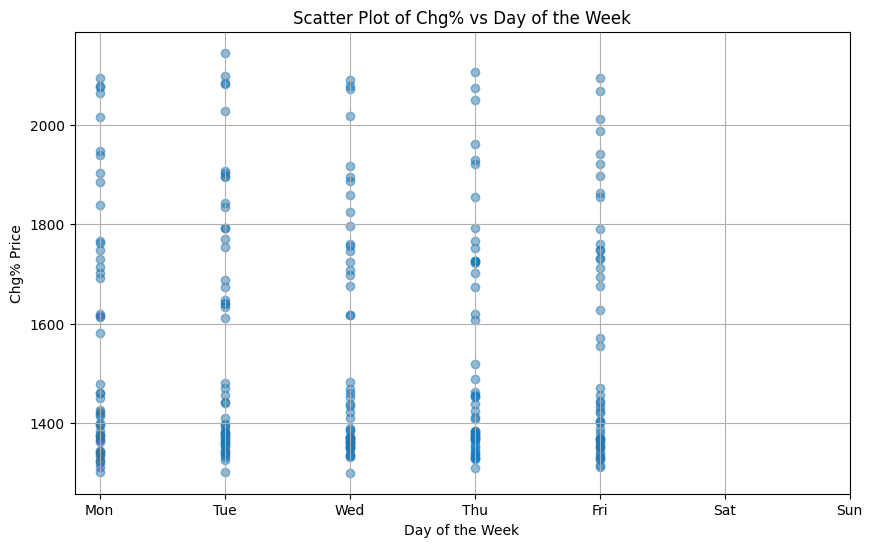

In [16]:
# Make a scatter plot of Chg% data against the day of the week

# plotting the graph
irctc_df['Date'] = pd.to_datetime(irctc_df['Date'])
irctc_df['DayOfWeek'] = irctc_df['Date'].dt.weekday

# irctc_df['DayOfWeek'] = irctc_df['Day']


#creating a plot

plt.figure(figsize=(10, 6))
plt.scatter(irctc_df['DayOfWeek'], irctc_df['Price'], alpha=0.5)
plt.xlabel('Day of the Week')
plt.ylabel('Chg% Price')
plt.title('Scatter Plot of Chg% vs Day of the Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)

plt.show()
# irctc_df

In [23]:
thyroid_df = pd.read_excel('labSession.xlsx', sheet_name = 'thyroid0387_UCI')
# thyroid_df = df.dropna(axis = 1)
print(thyroid_df)


      Record ID  age sex on thyroxine query on thyroxine  \
0     840801013   29   F            f                  f   
1     840801014   29   F            f                  f   
2     840801042   41   F            f                  f   
3     840803046   36   F            f                  f   
4     840803047   32   F            f                  f   
...         ...  ...  ..          ...                ...   
9167  870119022   56   M            f                  f   
9168  870119023   22   M            f                  f   
9169  870119025   69   M            f                  f   
9170  870119027   47   F            f                  f   
9171  870119035   31   M            f                  f   

     on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
0                            f    f        f               f              f   
1                            f    f        f               f              f   
2                            f    f       

In [25]:
#  Study each attribute and associated values present. Identify the datatype (nominal etc.)
# for the attribute

thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Record ID                  9172 non-null   int64 
 1   age                        9172 non-null   int64 
 2   sex                        9172 non-null   object
 3   on thyroxine               9172 non-null   object
 4   query on thyroxine         9172 non-null   object
 5   on antithyroid medication  9172 non-null   object
 6   sick                       9172 non-null   object
 7   pregnant                   9172 non-null   object
 8   thyroid surgery            9172 non-null   object
 9   I131 treatment             9172 non-null   object
 10  query hypothyroid          9172 non-null   object
 11  query hyperthyroid         9172 non-null   object
 12  lithium                    9172 non-null   object
 13  goitre                     9172 non-null   object
 14  tumor   

In [27]:
thyroid_df.describe()

,Record ID,age
count,9.172000e+03,9172.000000
mean,8.529473e+08,73.555822
std,7.581969e+06,1183.976718
min,8.408010e+08,1.000000
25%,8.504090e+08,37.000000
50%,8.510040e+08,55.000000
75%,8.607110e+08,68.000000
max,8.701190e+08,65526.000000


In [30]:
thyroid_df.isnull().sum()


,0
Record ID,0
age,0
sex,0
on thyroxine,0
query on thyroxine,0
on antithyroid medication,0
sick,0
pregnant,0
thyroid surgery,0
I131 treatment,0


In [32]:
thyroid_df = thyroid_df.replace('?', np.nan)

thyroid_df.isnull().sum()

,0
Record ID,0
age,0
sex,307
on thyroxine,0
query on thyroxine,0
on antithyroid medication,0
sick,0
pregnant,0
thyroid surgery,0
I131 treatment,0


In [33]:
thyroid_df.fillna(thyroid_df.mean(), inplace=True)


TypeError: can only concatenate str (not "int") to str